# Appendix B - Inflation Rate Dataset

This dataset comes from [macrotrends.net](https://www.macrotrends.net/countries/USA/united-states/inflation-rate-cpi) for the [United States Inflation Rate](https://www.macrotrends.net/countries/USA/united-states/inflation-rate-cpi) since 1960. The dataset below will calculate a multiplier for us per year until today.

Install `openpyxl` if you need to use `.xlsx` files with Pandas. This is 100% optional but I've found a number of inflation rate datasets that are based in `xlsx` (Excel).

In [1]:
# %pip install openpyxl

Install `matplotlib` so we can plot the graphs below.

In [2]:
# %pip install matplotlib

In [3]:
import datetime
from functools import reduce
import pandas as pd
import pathlib

In [4]:
BASE_DIR = pathlib.Path().resolve().parent.parent
COURSES_DIR = BASE_DIR / 'course'
APPENDIX_DIR = COURSES_DIR / 'appendix'
DATASET_PATH = COURSES_DIR / 'datasets'
SOURCE_FILE = APPENDIX_DIR / 'appendix-b-united-states-inflation-rate.csv'
OUTPUT_PATH = DATASET_PATH / 'inflation-rate.csv'

The `SOURCE_FILE` has 2 columns: `date` and `Inflation Rate (%)`. Pandas can turn a valid date column into our index (instead of using incrementing integers). 

In [5]:
init_df = pd.read_csv(SOURCE_FILE, 
                 parse_dates=["date"],
                 usecols=[0, 1],
                 index_col=0,
                 skiprows=16
                ).rename(columns={" Inflation Rate (%)": "inflation_rate_percent"})

<AxesSubplot:xlabel='date'>

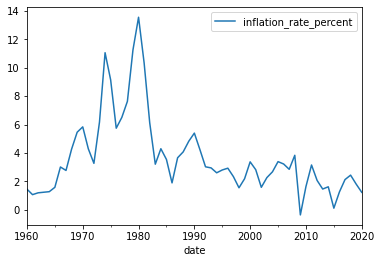

In [6]:
init_df.plot()

In [7]:
df = init_df.div(100).add(1)
df.loc['1990':'2020']

,inflation_rate_percent
date,
1990-12-31,1.053980
1991-12-31,1.042350
1992-12-31,1.030288
1993-12-31,1.029517
1994-12-31,1.026074
1995-12-31,1.028054
1996-12-31,1.029312
1997-12-31,1.023377
1998-12-31,1.015523


<AxesSubplot:xlabel='date'>

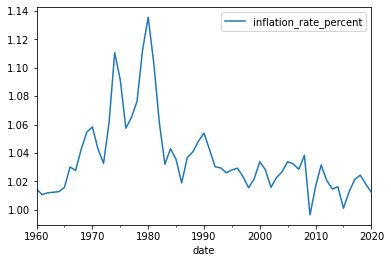

In [8]:
df.plot()

Multiplier example. To do this, we get product of inflation rate values for a given date range such as:

1.02 x 1.03 x 1.04

First, get inflation values based on a range:

In [9]:
values = df.loc["1990":"2020"]['inflation_rate_percent'].values 
values

array([1.05398 , 1.04235 , 1.030288, 1.029517, 1.026074, 1.028054,
       1.029312, 1.023377, 1.015523, 1.02188 , 1.033769, 1.028262,
       1.01586 , 1.022701, 1.026772, 1.033927, 1.032259, 1.028527,
       1.038391, 0.996445, 1.0164  , 1.031568, 1.020693, 1.014648,
       1.016222, 1.001186, 1.012616, 1.021301, 1.024426, 1.018122,
       1.012336])

Turn`values` into a product using `reduce`:

In [10]:
reduce((lambda x, y: x * y), values)

2.08774508880239

You can easily use `numpy` instead of `reduce`:

```python
import numpy as np

np.prod(values)
```

Calculate the multiplier per row until reaching the final row.

In [11]:
def calculate_multiplier(row):
    current_year = row.name.year + 1
    final_year = df.iloc[-1].name.year
    values = df.loc[f"{current_year}" : f"{final_year}"]['inflation_rate_percent'].values
    if len(values) == 0:
        row['multiplier'] = 1
        return row
    row['multiplier']= reduce((lambda x, y: x * y), values)
    return row

df = df.apply(calculate_multiplier, axis=1)

Review values between 1990 and 2020

In [12]:
df.loc['1990':'2020']

,inflation_rate_percent,multiplier
date,,
1990-12-31,1.053980,1.980820
1991-12-31,1.042350,1.900341
1992-12-31,1.030288,1.844475
1993-12-31,1.029517,1.791593
1994-12-31,1.026074,1.746066
1995-12-31,1.028054,1.698419
1996-12-31,1.029312,1.650052
1997-12-31,1.023377,1.612360
1998-12-31,1.015523,1.587714


In [13]:
df.to_csv(OUTPUT_PATH)